In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
path = "D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\raw"

In [6]:
freqs_to_v = dict()
for dir in os.listdir(path):
    freqs_to_v[int(dir[:2])] = []

In [7]:
for dir in os.listdir(path):
    freq = int(dir[:2])
    for file in os.listdir(path + "\\" + dir):
        data = pd.read_csv(path + "\\" + dir + "\\" + file)
        xs = data["x_um"].to_numpy()
        ys = data["y_um"].to_numpy()
        ts = data["time"].to_numpy()
        initial_x = xs[0]
        initial_y = ys[0]
        final_x = xs[-1]
        final_y = ys[-1]
        duration = ts[-1] - ts[0]
        freqs_to_v[freq].append(np.sqrt((final_x - initial_x)**2 + (final_y - initial_y)**2) / duration)
        

In [8]:
freqs = np.array(list(freqs_to_v.keys()))
actual_freqs = freqs * 0.9
mean_vs = np.array([np.array(freqs_to_v[freq]).mean() for freq in freqs])
std_vs = np.array([np.array(freqs_to_v[freq]).std() for freq in freqs])
expected_vs = actual_freqs * 10
percent_errors = abs(mean_vs - expected_vs) / expected_vs * 100

In [9]:
percent_errors

array([ 5.66977054,  3.36998211,  1.46903197,  3.82296628,  4.23449839,
        8.65544442,  3.92784738,  1.51984757,  1.04837441,  5.37106549,
        6.8747468 , 16.28887096, 29.433888  , 43.54906574, 58.70904634,
       67.08147127, 72.7400649 , 76.96363783, 80.46191216, 85.43138829,
       86.84085022, 85.28568369, 85.05515541, 89.49349687, 89.5942012 ,
       88.76849506, 89.46018367, 89.15536338, 89.27993854, 91.89401166])

In [10]:
result = pd.DataFrame(columns=["freq", "actual_freq", "mean_v", "std_v", "expected_v", "percent_error"])
result["freq"] = freqs
result["actual_freq"] = actual_freqs
result["mean_v"] = mean_vs
result["std_v"] = std_vs
result["expected_v"] = expected_vs
result["percent_error"] = percent_errors


In [12]:
old_result = pd.read_csv("D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\dia_range_2_12.csv")

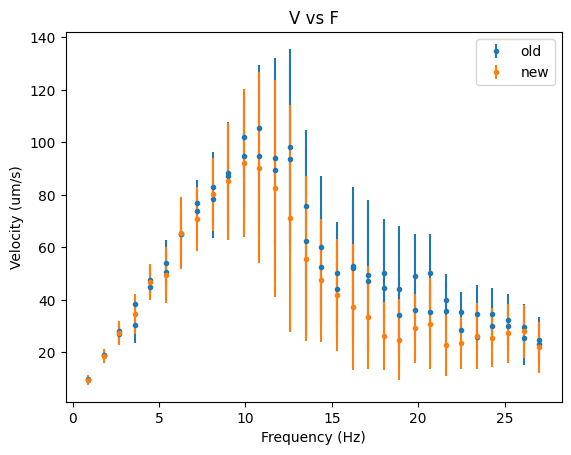

In [13]:
plt.errorbar(old_result["actual_frequency"], old_result["mean_velocity"], 
             yerr=old_result["standard_deviation"], fmt='.', label="old",)
plt.errorbar(actual_freqs, mean_vs, yerr=std_vs, fmt='.', label="new")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (um/s)")
plt.title("V vs F")
plt.legend()
plt.show()